IMPORTING LIBRARIES

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

LOADING DATA

In [10]:
titanic  = sns.load_dataset("titanic")

In [11]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


EDA ON TITANIC DATASET

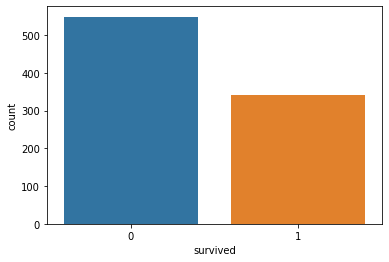

In [17]:
sns.countplot(x=titanic.survived)

In [22]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

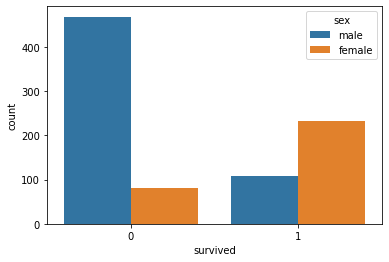

In [20]:
sns.countplot(x = titanic.survived, hue = titanic.sex)

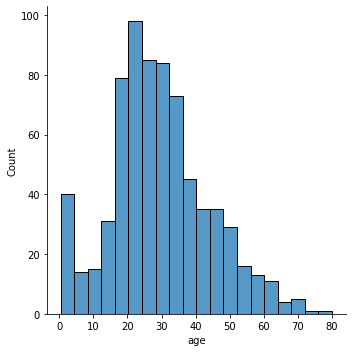

In [24]:
sns.displot(x = titanic.age)

In [25]:
titanic["age"].fillna(titanic['age'].mean(),inplace = True)

In [26]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [48]:
titanic_data = titanic.drop(["deck","embark_town","alone","embarked","who","adult_male","class","alive"],axis = "columns")

In [49]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
titanic_data['sex'] = LabelEncoder().fit_transform(titanic_data['sex'])

In [52]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [53]:
x = titanic_data.drop(["survived"],axis = "columns")

In [54]:
x.head()

,pclass,sex,age,sibsp,parch,fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [58]:
y = titanic_data["survived"]

In [59]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

MODELLING DATASET

In [60]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2)

In [63]:
model = linear_model.LogisticRegression()

In [64]:
model.fit(X_train,Y_train)

LogisticRegression()

In [65]:
model.score(X_test,Y_test)

0.8100558659217877

In [66]:
X_test

,pclass,sex,age,sibsp,parch,fare
507,1,1,29.699118,0,0,26.5500
798,3,1,30.000000,0,0,7.2292
858,3,0,24.000000,0,3,19.2583
820,1,0,52.000000,1,1,93.5000
587,1,1,60.000000,1,1,79.2000
...,...,...,...,...,...,...
666,2,1,25.000000,0,0,13.0000
428,3,1,29.699118,0,0,7.7500
68,3,0,17.000000,4,2,7.9250
24,3,0,8.000000,3,1,21.0750


In [67]:
model.predict([[1,0,52,1,1,93]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [68]:
Y_test


507    1
798    0
858    1
820    1
587    1
      ..
666    0
428    0
68     1
24     0
796    1
Name: survived, Length: 179, dtype: int64